Primero las funciones y clases a usar en el perceptron

In [1]:
#Freddy Alejandro Florez Bohorquez
#Inteligencia Artificial
#enlace https://colab.research.google.com/drive/1gAQ-trZbPkTQWIrS3Uy7tgwF9z4UU9rS?usp=sharing
#Referencia https://unipython.com/prediccion-de-series-temporales-con-perceptrones-multicapa/

##Importamos librerias

import numpy                          #Numpy para el manejo de arrays
import matplotlib.pyplot as plt       #Matplotlib para el manejo de graficos en python
from pandas import read_csv           #Pandas para el manejo de tablas
import math                           #Math para el manejo de librerias matematicas
from keras.models import Sequential   #keras para el manejo de secuencias 
from keras.layers import Dense        #Keras para el manejo de las capas

# semilla aleatoria para rerpoducibilidad
numpy.random.seed(7)

En la siguiente celda cargamos el archivo a un drive para que el dataframe lea el archivo csv le aplique una funcion de values y el tipo de dato del datset

In [2]:
# cargamos el conjunto de datos
dataframe = read_csv('/content/drive/MyDrive/Perceptron/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

Después de modelar nuestros datos y estimar la habilidad de nuestro modelo en el conjunto de datos de capacitación, nosotros necesitamos tener una idea de la habilidad del modelo en datos nuevos e invisibles. Para una clasificación normal o problema de regresión, lo haríamos utilizando la validación cruzada. 

In [3]:
#dividimos datos en entreno y datos para el test
train_size = int(len(dataset) * 0.67)     #Tamaño de datos de entrenamiento
test_size = len(dataset) - train_size     #Tamaño del test_size para pruebas
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:] #para saber de donde inicia el de pruebas y test
print(len(train), len(test))     #Muestra los tamaños de cada uno de los dataset tanto para pruebas como para entrenamiento

96 48


Ahora se  ejecuta una función para crear un nuevo conjunto de datos tal y como se ha descrito anteriormente. La función toma dos argumentos, el conjunto de datos que es un array Numpy que queremos convertir en un conjunto de datos y el look_back, que es el número de pasos de tiempo previos que se deben utilizar como variables de entrada para predecir el siguiente período de tiempo, en este caso, por defecto es 1. Este valor por defecto creará un conjunto de datos donde X es el número de pasajeros en un momento dado (t) e Y es el número de pasajeros en el momento siguiente de tiempo (t+1). Puede ser configurado y miraremos en la construcción de un conjunto de datos de forma diametralmente opuesta en la siguiente sección.

In [5]:
# convertir un array de valores en una matriz de conjuntos de datos
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []                             #Inicialiso los vectores para  los datos de dataX y dataY

  for i in range(len(dataset)-look_back-1):         #para ir visualizando la secuencia anterior
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)                                 #para ir agregando al dataX
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)     #retorna para dataX y dataY


Lo anterior se uso para preparar en conjunto de datos


In [7]:
# remodelamos X=t y Y=t+1
look_back = 1                                       #se inicializa el look_back en 1
trainX, trainY = create_dataset(train, look_back)   #se le manda por parametro para crear para entrenamiento
testX, testY = create_dataset(test, look_back)      #se le manda por parametro para crear para validacion

Ahora se puede ajustar un modelo de Perceptron Multicapa a los datos de entrenamiento. Usamos una red simple con 1 entrada, 1 capa oculta con 8 neuronas y una capa de salida. El modelo se ajusta utilizando el error cuadrático medio para la funcion de perdida, si tomamos la raíz cuadrada nos da una puntuación de error en las unidades del conjunto de datos. Intenté algunos parámetros aproximados y establecí la configuración a continuación, pero de ninguna manera la red está optimizada. ademas hay un optimizador adam que viene de keras y el modelo se entrenara con 100 epocas

In [8]:
# crear y adaptar el modelo Perceptron multicapa
model = Sequential()                                           #creamos un objeto modelo de secuencia
model.add(Dense(8, input_dim=look_back, activation='relu'))    #le adicionamos al modelo una capa de 8, la dimencion de las entradas y la activacion
model.add(Dense(1))                                            #le adicionamos otra capa
model.compile(loss='mean_squared_error', optimizer='adam')     #luego de eso compilamos el modelo con la funcion de loss de minimos cuadrados y optimizador adam
model.fit(trainX, trainY, epochs=100, batch_size=2, verbose=2) #le indicamos al modelo las entradas a entrenar el numero de epocas y el tamaño

Epoch 1/100
47/47 - 1s - loss: 12956.4473 - 593ms/epoch - 13ms/step
Epoch 2/100
47/47 - 0s - loss: 6640.2598 - 51ms/epoch - 1ms/step
Epoch 3/100
47/47 - 0s - loss: 3226.7783 - 57ms/epoch - 1ms/step
Epoch 4/100
47/47 - 0s - loss: 1617.7191 - 63ms/epoch - 1ms/step
Epoch 5/100
47/47 - 0s - loss: 923.0985 - 55ms/epoch - 1ms/step
Epoch 6/100
47/47 - 0s - loss: 650.5671 - 56ms/epoch - 1ms/step
Epoch 7/100
47/47 - 0s - loss: 568.5323 - 57ms/epoch - 1ms/step
Epoch 8/100
47/47 - 0s - loss: 544.4459 - 58ms/epoch - 1ms/step
Epoch 9/100
47/47 - 0s - loss: 542.5526 - 57ms/epoch - 1ms/step
Epoch 10/100
47/47 - 0s - loss: 541.6770 - 58ms/epoch - 1ms/step
Epoch 11/100
47/47 - 0s - loss: 537.7285 - 61ms/epoch - 1ms/step
Epoch 12/100
47/47 - 0s - loss: 539.7668 - 60ms/epoch - 1ms/step
Epoch 13/100
47/47 - 0s - loss: 544.9567 - 63ms/epoch - 1ms/step
Epoch 14/100
47/47 - 0s - loss: 543.1408 - 62ms/epoch - 1ms/step
Epoch 15/100
47/47 - 0s - loss: 538.5423 - 64ms/epoch - 1ms/step
Epoch 16/100
47/47 - 0s - l

Una vez el modelo ajustado, podemos estimar el rendimiento del modelo en el entramiento y los conjuntos de datos de prueba. Esto nos dará un punto de comparación para los nuevos modelos.

In [10]:
# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)  #modelo de validacion para ver que control tiene mi red neuronal en entrenamiento
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)     #modelo de validacion para ver el control en la parte de pruebas
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Resultado del entrenamiento: 538.95 MSE (23.22 RMSE)
Resultado del test: 2369.00 MSE (48.67 RMSE)


Finalmente, podemos generar predicciones utilizando el modelo tanto para el entrenamiento como para el conjunto de datos de prueba para obtener una indicación visual de la habilidad del modelo. Debido a cómo se preparó el set de datos, debemos cambiar las predicciones para que se alineen en el eje x con el conjunto de datos original. Una vez preparados, se grafican los datos, mostrando el conjunto de datos original en azul, las predicciones para el conjunto de datos del entrenamiento en rojo y las predicciones sobre el conjunto de datos de prueba no visto en magenta.

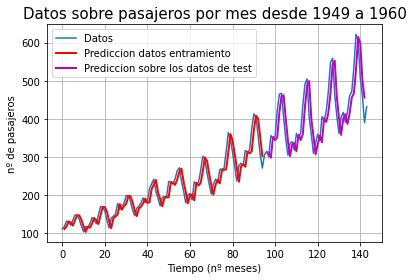

In [12]:
# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# predicciones de la prueba de desplazamiento para plotear
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# ploteamos la línea de base y las predicciones
plt.plot(dataset)
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)

#Elementos graficos para el plot
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
plt.grid(True) 
plt.title("Datos sobre pasajeros por mes desde 1949 a 1960", fontsize = 15)
plt.xlabel("Tiempo (nº meses)", fontsize = 10)
plt.ylabel("nº de pasajeros", fontsize = 10)
plt.show()

Podemos ver que el modelo hizo un trabajo bastante regular en la evaluación de los set de datos de entrenamiento y de pruebas. Básicamente predijo el mismo valor de entrada que la salida. La gráfica hace que la predicción parezca buena, pero de hecho, el cambio en la predicción resulta en una puntuación de habilidad regular.

viendi la raíz cuadrada de las estimaciones de rendimiento, podemos ver que el modelo tiene un error medio de 23 pasajeros (en miles) en el conjunto de datos de formación y 48 pasajeros (en miles) en el conjunto de datos de prueba.